In [35]:
# Install necessary packages
!apt-get update
!apt-get install -y wget unzip

# Download Microsoft Edge
!wget https://msedgedriver.azureedge.net/114.0.1823.51/edgedriver_linux64.zip
!unzip edgedriver_linux64.zip
!mv msedgedriver /usr/local/bin/msedgedriver
!chmod +x /usr/local/bin/msedgedriver

# Install Microsoft Edge browser
!wget https://packages.microsoft.com/repos/edge/pool/main/m/microsoft-edge-stable/microsoft-edge-stable_115.0.1901.188-1_amd64.deb
!dpkg -i microsoft-edge-stable_115.0.1901.188-1_amd64.deb
!apt-get -f install -y

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [920 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,132 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InReleas

In [36]:
!pip install selenium
!pip install webdriver-manager #install webdriver-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00


In [37]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time

# Set up Edge options
edge_options = Options()
edge_options.add_argument('--headless')  # Ensure GUI is off
edge_options.add_argument('--no-sandbox')
edge_options.add_argument('--disable-dev-shm-usage')

# Initialize the WebDriver
service = Service('/usr/local/bin/msedgedriver')
driver = webdriver.Edge(service=service, options=edge_options)

# Open the website
url = 'https://www.cars24.com/buy-used-cars-bangalore/' #https://www.cars24.com/buy-used-cars-bangalore/(ahmedabad)
driver.get(url)
print(driver.title)

# Wait for the page to load
time.sleep(5)

# Scroll to the bottom of the page to load all items
pages = 64   #64,23
page_delay = 5
for i in range(pages):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(page_delay)
    print(f"Page {i + 1} of {pages} loaded")

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Extract car data
car_elements = soup.find_all('div', class_='_2YB7p')

# Initialize lists to store extracted data
years = []
companies = []
car_names = []
km_driven = []
fuel_type = []
transmission = []
price = []
locations = []

# Loop through each car element and extract data
for car in car_elements:
    try:
        # Extract the car title
        title = car.find('h3').get_text(strip=True)
        year, company, *name_parts = title.split()
        car_name = " ".join(name_parts)

        # Extract other details
        details = car.find('ul', class_='_3J2G-').find_all('li')
        km = details[0].get_text(strip=True)
        fuel = details[2].get_text(strip=True)
        trans = details[4].get_text(strip=True)

        # Extract the price
        price = []
        strong = soup.find_all('strong',class_='_3RL-I')
        for p in strong:
          price.append(p.text)
          def extract_price(price):
            price = price.replace('₹', '')
            price = price.replace('Lakh', '')

        # Extract location data
        location = []
        location_element = soup.find("div",{'class':'_2SBi0'})
        if location_element:
          locations.append(location_element.get_text())
        else:
          locations.append('N/A')
        #print(locations)


        # Append data to lists
        years.append(int(year))
        companies.append(company)
        car_names.append(car_name)
        km_driven.append(int(km.replace(',', '').strip(' km')))
        fuel_type.append(fuel)
        transmission.append(trans)

    except (AttributeError, IndexError, ValueError) as e:
        # Handle missing data or parsing issues gracefully
        print(f"Error parsing car data: {e}")
        continue

# Create a DataFrame
data = pd.DataFrame({
    'year': years,
    'company': companies,
    'car_name': car_names,
    'km_driven': km_driven,
    'fuel_type': fuel_type,
    'transmission': transmission,
    'price': price,
    'location': locations,
})

# Display the DataFrame
print(data)

# Save the data to a CSV file
data.to_csv('cars_data.csv', index=False)

print("Data has been successfully saved to cars_data.csv")

# Close the WebDriver
driver.quit()

Used Cars in Bangalore - MRL Certified Second Hand Cars
Page 1 of 64 loaded
Page 2 of 64 loaded
Page 3 of 64 loaded
Page 4 of 64 loaded
Page 5 of 64 loaded
Page 6 of 64 loaded
Page 7 of 64 loaded
Page 8 of 64 loaded
Page 9 of 64 loaded
Page 10 of 64 loaded
Page 11 of 64 loaded
Page 12 of 64 loaded
Page 13 of 64 loaded
Page 14 of 64 loaded
Page 15 of 64 loaded
Page 16 of 64 loaded
Page 17 of 64 loaded
Page 18 of 64 loaded
Page 19 of 64 loaded
Page 20 of 64 loaded
Page 21 of 64 loaded
Page 22 of 64 loaded
Page 23 of 64 loaded
Page 24 of 64 loaded
Page 25 of 64 loaded
Page 26 of 64 loaded
Page 27 of 64 loaded
Page 28 of 64 loaded
Page 29 of 64 loaded
Page 30 of 64 loaded
Page 31 of 64 loaded
Page 32 of 64 loaded
Page 33 of 64 loaded
Page 34 of 64 loaded
Page 35 of 64 loaded
Page 36 of 64 loaded
Page 37 of 64 loaded
Page 38 of 64 loaded
Page 39 of 64 loaded
Page 40 of 64 loaded
Page 41 of 64 loaded
Page 42 of 64 loaded
Page 43 of 64 loaded
Page 44 of 64 loaded
Page 45 of 64 loaded
Page 46 

In [38]:
data.head(1216)

,year,company,car_name,km_driven,fuel_type,transmission,price,location
0,2017,Mahindra,XUV500 W4,23745,Diesel,Manual,₹8.73 Lakh,Bangalore
1,2018,Honda,Amaze 1.2L I-VTEC S,30552,Petrol,Manual,₹5.73 Lakh,Bangalore
2,2021,Hyundai,GRAND I10 NIOS SPORTZ AMT 1.2 KAPPA VTVT,36554,Petrol,Automatic,₹7.18 Lakh,Bangalore
3,2012,Maruti,Swift VXI,64557,Petrol,Manual,₹4.63 Lakh,Bangalore
4,2013,Maruti,Swift VDI,96413,Diesel,Manual,₹4.44 Lakh,Bangalore
...,...,...,...,...,...,...,...,...
1211,2022,Honda,City 1.5L I-VTEC ZX,42212,Petrol,Manual,₹12.11 Lakh,Bangalore
1212,2021,Renault,Duster RXZ 1.3 TURBO PETROL MT,22588,Petrol,Manual,₹10.81 Lakh,Bangalore
1213,2016,Maruti,Wagon R 1.0 VXI AMT,40428,Petrol,Automatic,₹3.97 Lakh,Bangalore
1214,2016,Tata,Tiago XZ PETROL,48738,Petrol,Manual,₹4.41 Lakh,Bangalore


In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
# Upload the CSV file to Colab
from google.colab import files
uploaded = files.upload()

# Load the CSV file
import io
file_path = next(iter(uploaded))
data = pd.read_csv(io.BytesIO(uploaded[file_path]))

Saving cars_data_final.csv to cars_data_final.csv


In [41]:
# Cleaning the 'price' column
data['price'] = data['price'].str.replace('₹', '').str.replace('Lakh', '').str.replace(',', '').astype(float)

# Cleaning the 'km_driven' column
data['km_driven'] = data['km_driven'].str.replace(' km', '').str.replace(',', '').astype(float)

# Renaming 'ear' column to 'year'
data.rename(columns={'ear': 'year'}, inplace=True)

# Dropping rows with any missing values
data.dropna(inplace=True)

# Converting 'year' column to integer
data['year'] = data['year'].astype(int)

# Setting style for seaborn
sns.set(style="whitegrid")


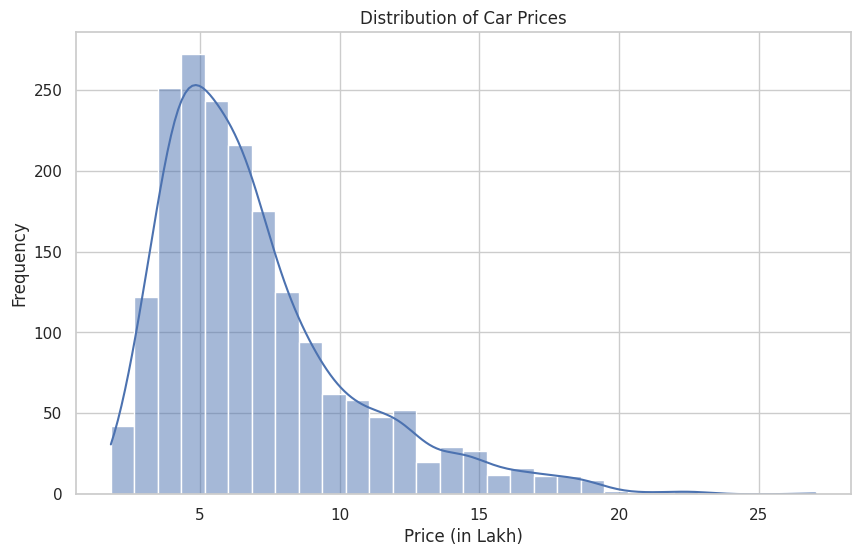

In [42]:
# Scenario 1: Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in Lakh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



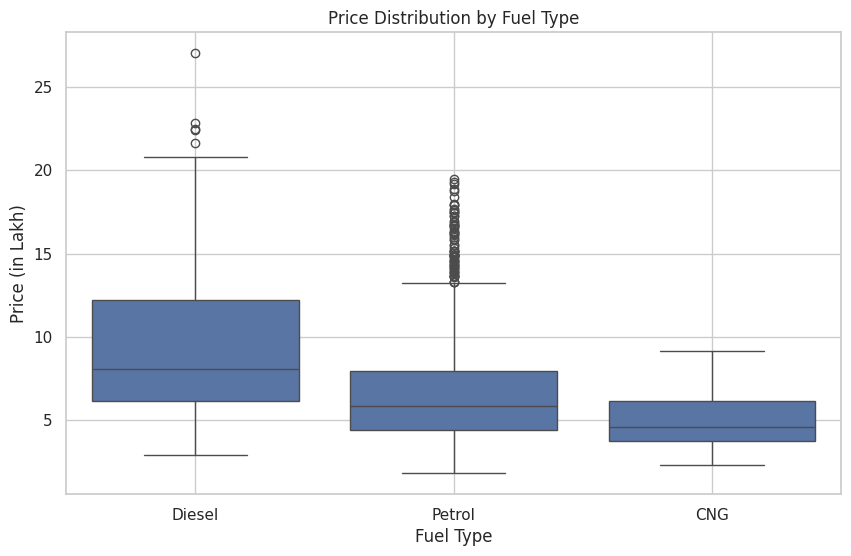

In [43]:
# Scenario 2: Price Distribution by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', data=data)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in Lakh)')
plt.grid(True)
plt.show()



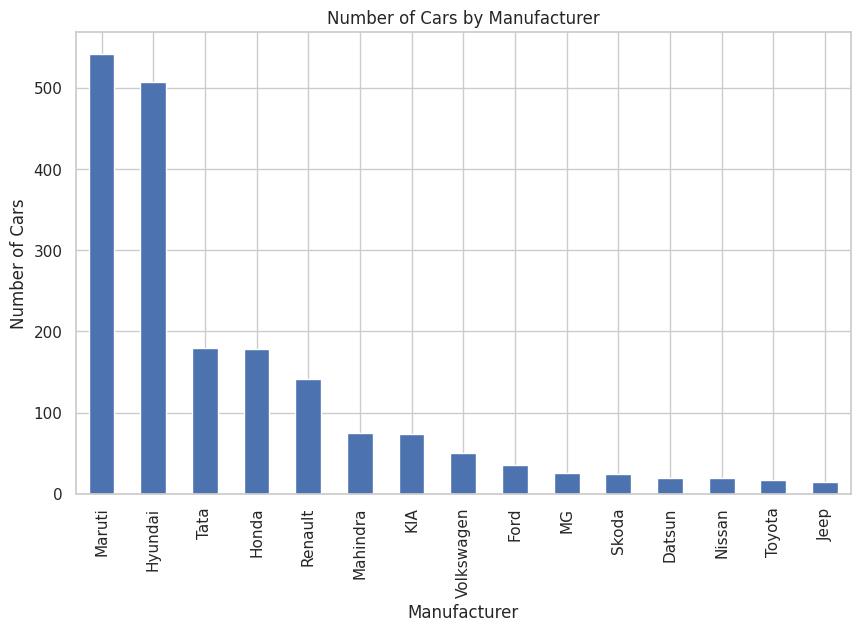

In [44]:
# Scenario 3: Number of Cars by Manufacturer
plt.figure(figsize=(10, 6))
data['company'].value_counts().plot(kind='bar')
plt.title('Number of Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()



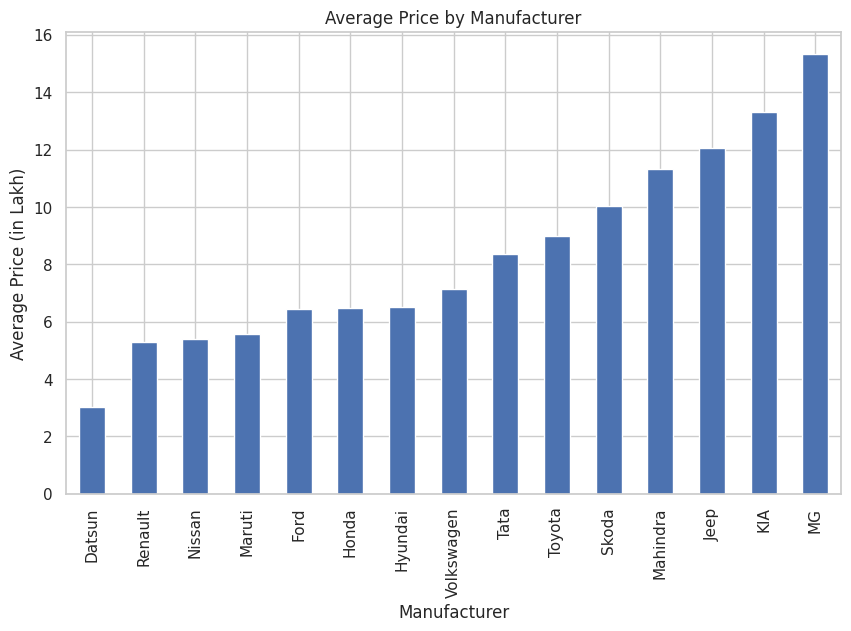

In [45]:
# Scenario 4: Average Price by Manufacturer
plt.figure(figsize=(10, 6))
data.groupby('company')['price'].mean().sort_values().plot(kind='bar')
plt.title('Average Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price (in Lakh)')
plt.grid(True)
plt.show()



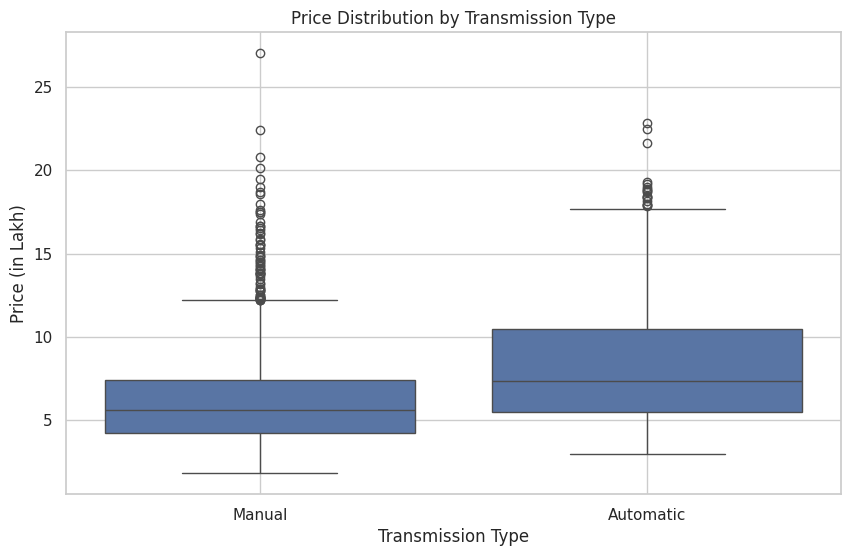

In [46]:
# Scenario 5: Price Distribution by Transmission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=data)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (in Lakh)')
plt.grid(True)
plt.show()



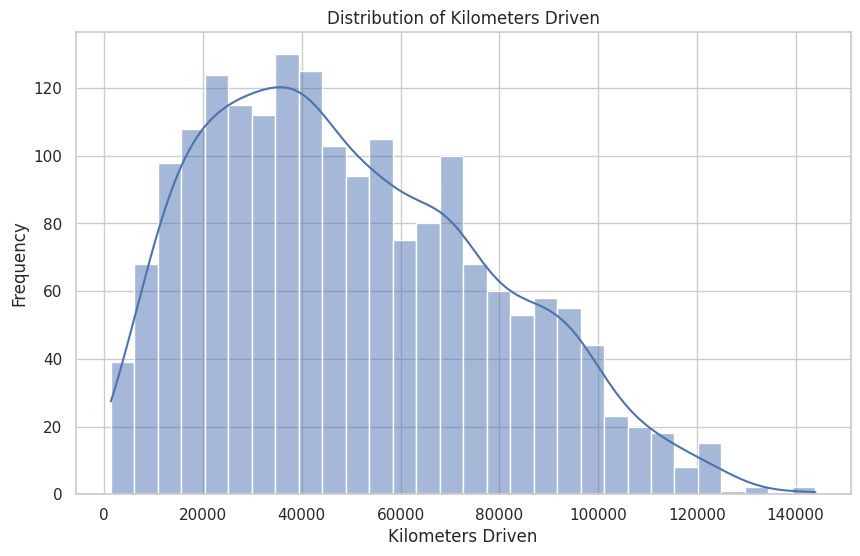

In [47]:
# Scenario 6: Distribution of Kilometers Driven
plt.figure(figsize=(10, 6))
sns.histplot(data['km_driven'], bins=30, kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



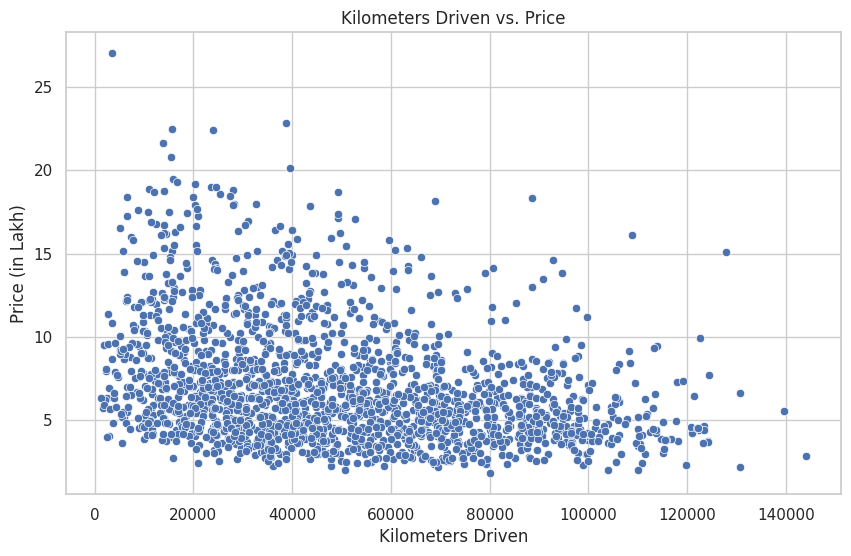

In [48]:
# Scenario 7: Kilometers Driven vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='price', data=data)
plt.title('Kilometers Driven vs. Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in Lakh)')
plt.grid(True)
plt.show()



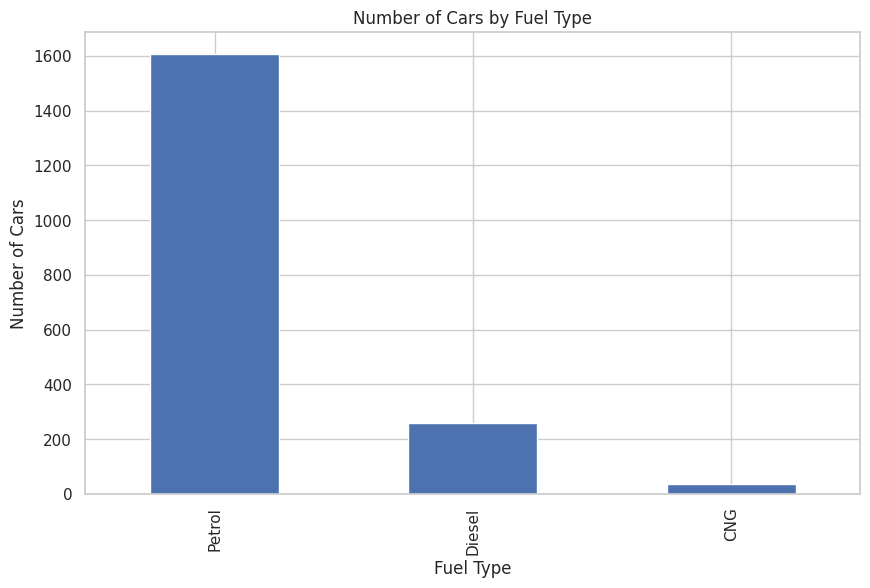

In [49]:
# Scenario 8: Number of Cars by Fuel Type
plt.figure(figsize=(10, 6))
data['fuel_type'].value_counts().plot(kind='bar')
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()



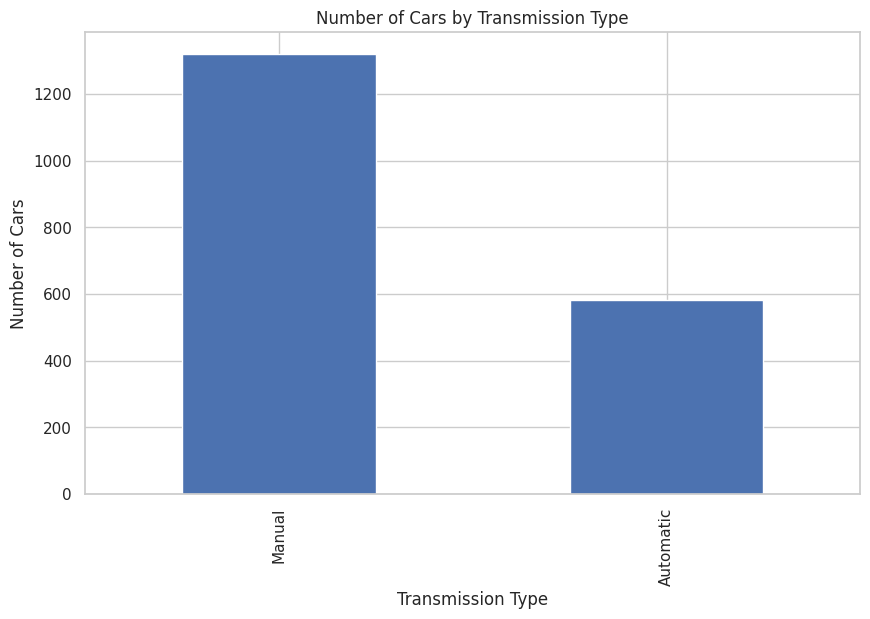

In [50]:
# Scenario 9: Number of Cars by Transmission Type
plt.figure(figsize=(10, 6))
data['transmission'].value_counts().plot(kind='bar')
plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()



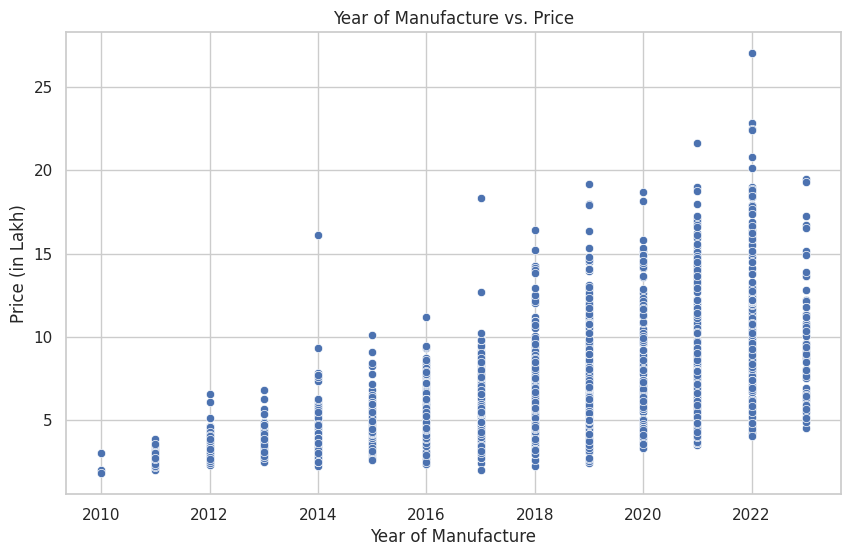

In [51]:
# Scenario 10: Year of Manufacture vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=data)
plt.title('Year of Manufacture vs. Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (in Lakh)')
plt.grid(True)
plt.show()



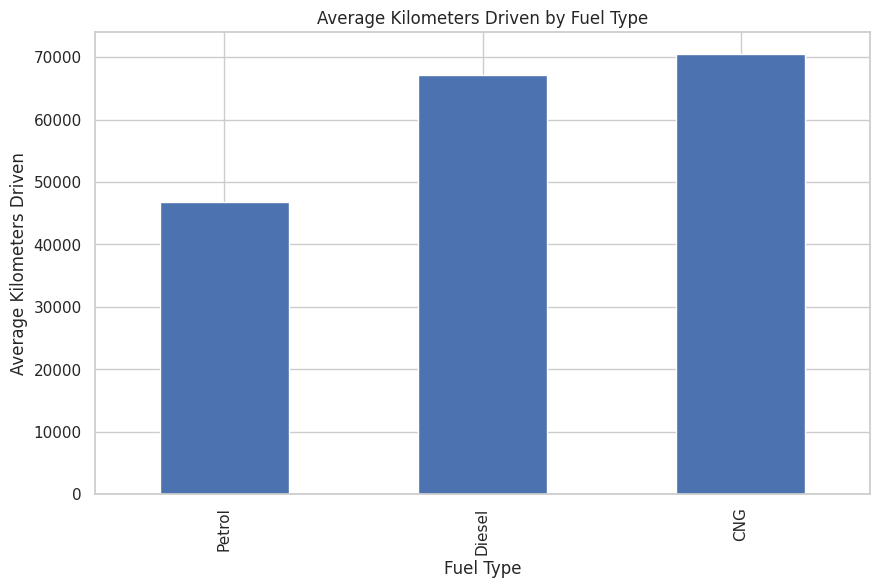

In [52]:
# Scenario 11: Average Kilometers Driven by Fuel Type
plt.figure(figsize=(10, 6))
# Convert 'km_driven' to numeric, handling errors
data['km_driven'] = pd.to_numeric(data['km_driven'], errors='coerce')
data.groupby('fuel_type')['km_driven'].mean().sort_values().plot(kind='bar')
plt.title('Average Kilometers Driven by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Kilometers Driven')
plt.grid(True)
plt.show()

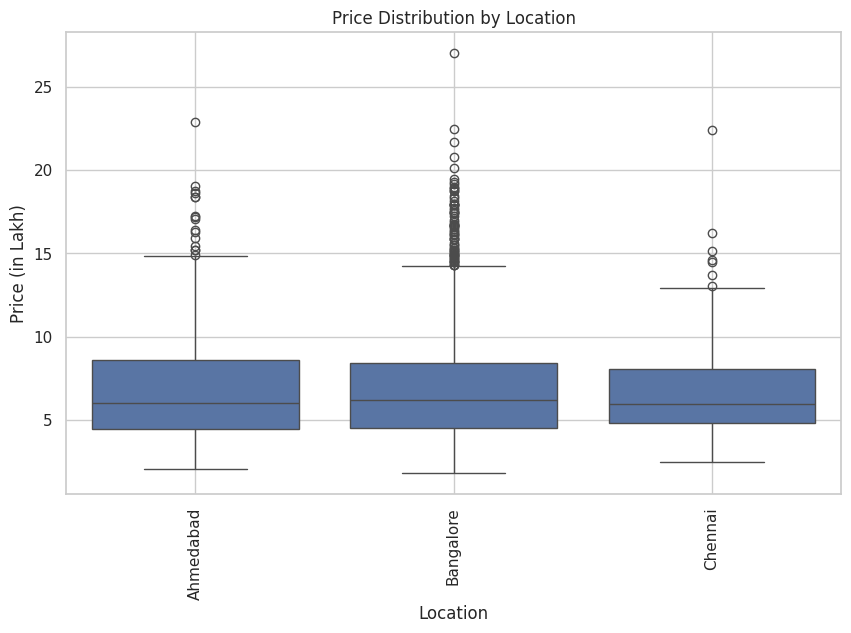

In [53]:
# Scenario 12: Price Distribution by Location
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='price', data=data)
plt.title('Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price (in Lakh)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()



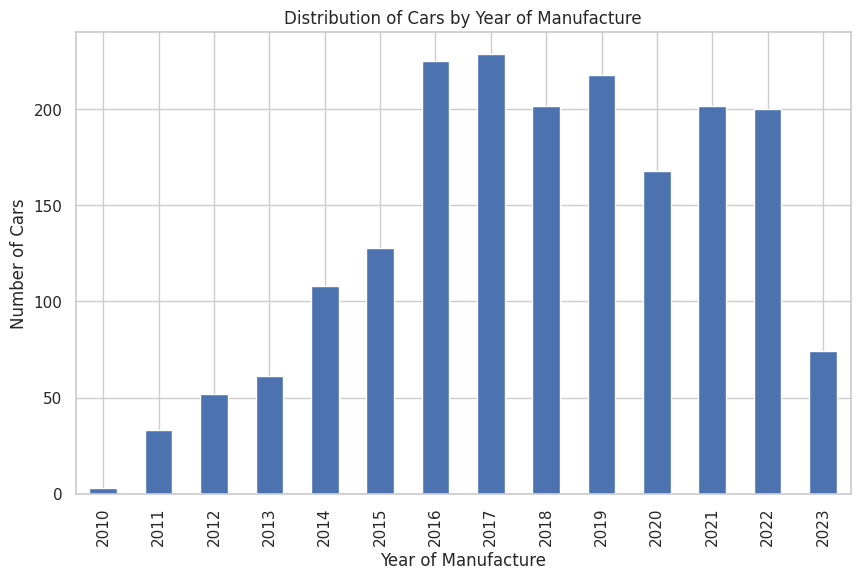

In [54]:
# Scenario 13: Distribution of Cars by Year of Manufacture
plt.figure(figsize=(10, 6))
data['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Cars by Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()



<ipython-input-55-bd1047d63a88>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fuel_type', y='price', hue='transmission', data=data, ci=None)


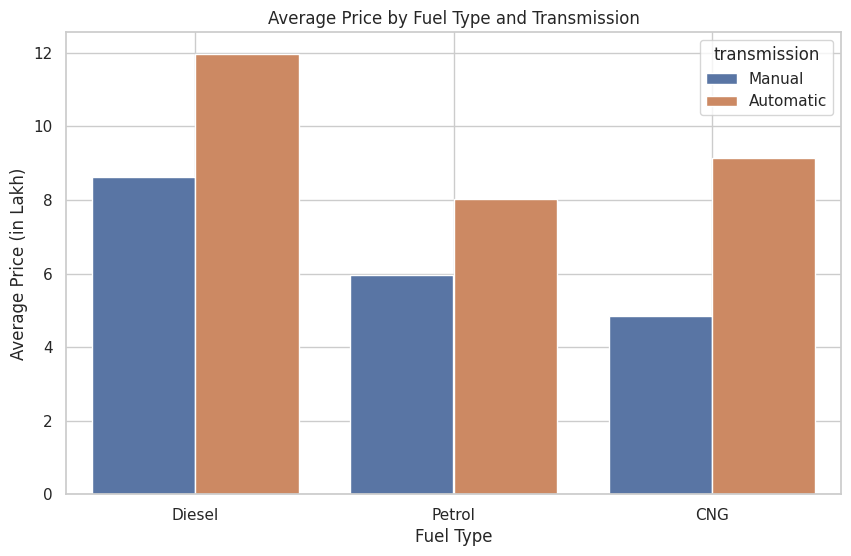

In [55]:
# Scenario 14: Average Price by Fuel Type and Transmission
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y='price', hue='transmission', data=data, ci=None)
plt.title('Average Price by Fuel Type and Transmission')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (in Lakh)')
plt.grid(True)
plt.show()



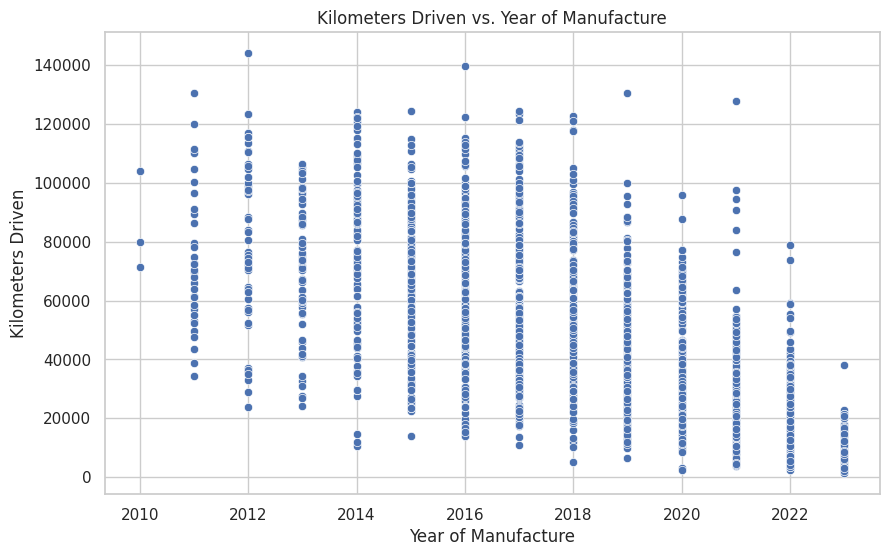

In [56]:
# Scenario 15: Kilometers Driven vs. Year of Manufacture
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='km_driven', data=data)
plt.title('Kilometers Driven vs. Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Kilometers Driven')
plt.grid(True)
plt.show()


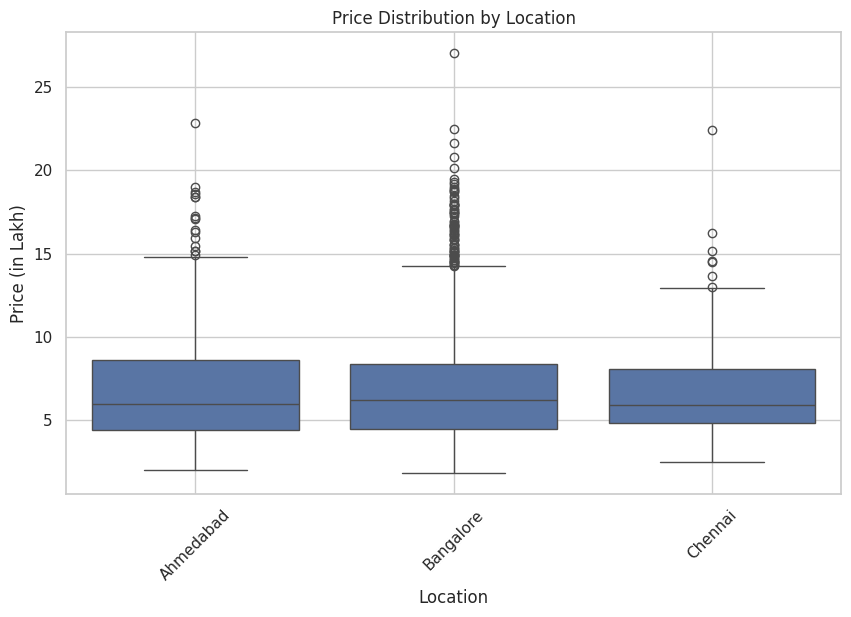

In [57]:
# Scenario 16: Distribution of Car Prices by Location
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='price', data=data)
plt.title('Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price (in Lakh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



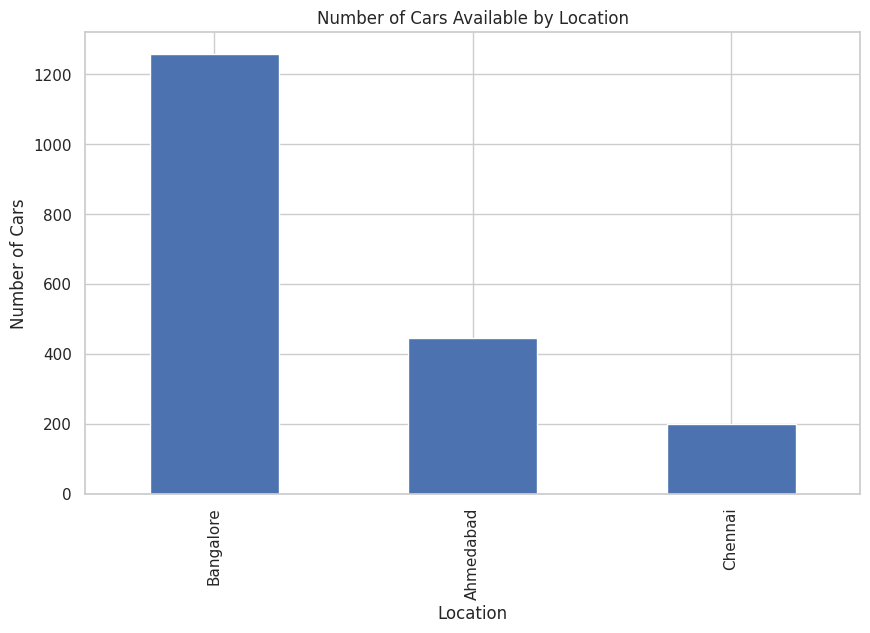

In [58]:
# Scenario 17: Number of Cars Available by Location
plt.figure(figsize=(10, 6))
data['location'].value_counts().plot(kind='bar')
plt.title('Number of Cars Available by Location')
plt.xlabel('Location')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()



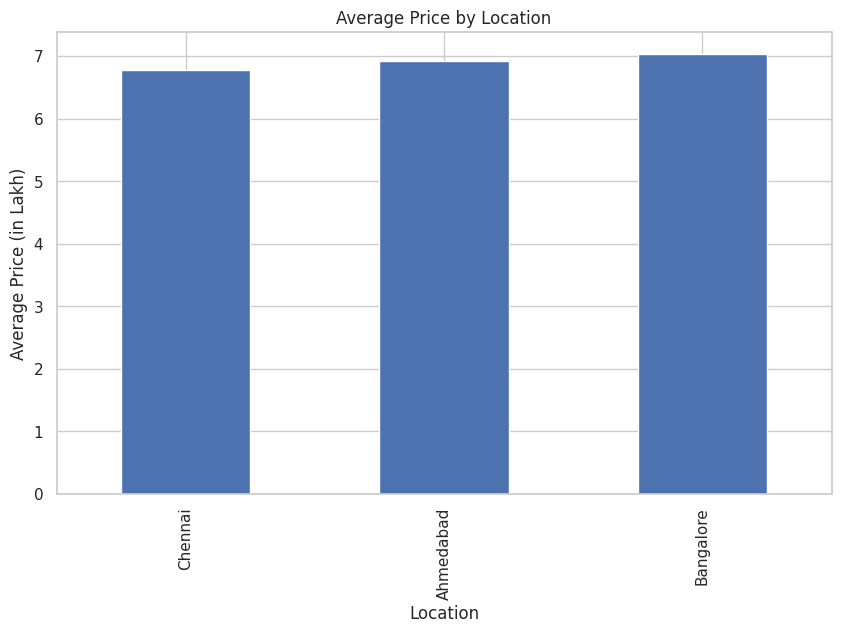

In [59]:
# Scenario 18: Average Price by Location
plt.figure(figsize=(10, 6))
data.groupby('location')['price'].mean().sort_values().plot(kind='bar')
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (in Lakh)')
plt.grid(True)
plt.show()



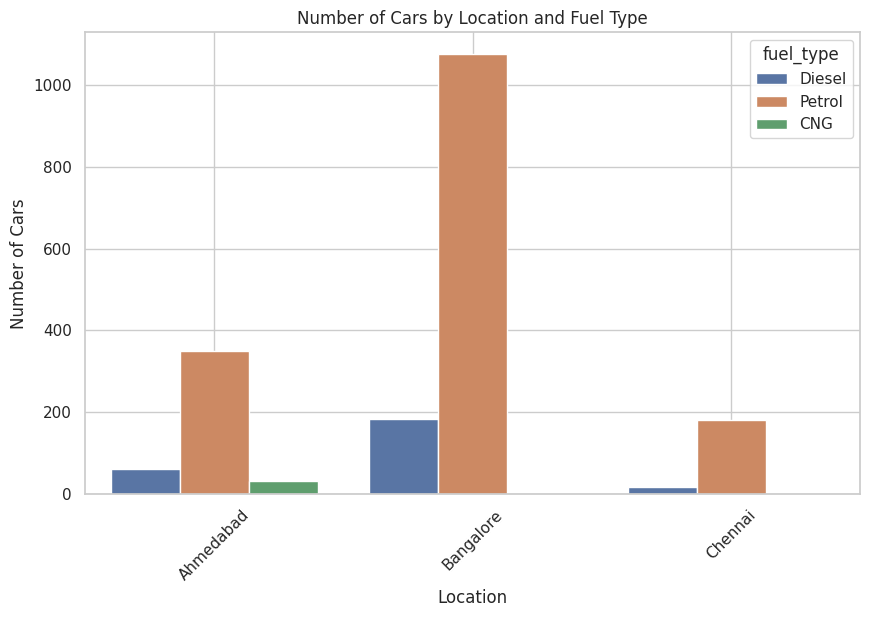

In [60]:
# Scenario 19: Number of Cars by Location and Fuel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='location', hue='fuel_type', data=data)
plt.title('Number of Cars by Location and Fuel Type')
plt.xlabel('Location')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



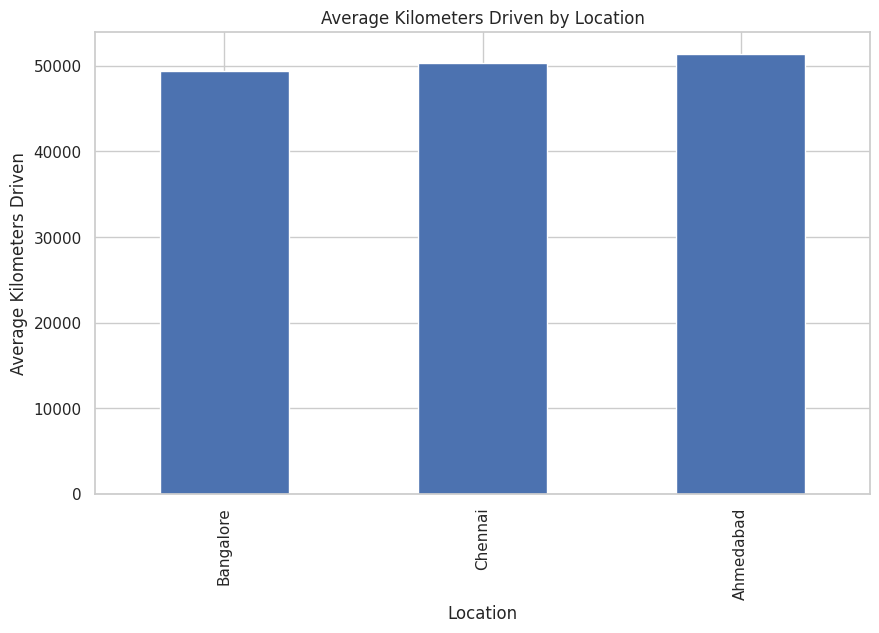

In [61]:
# Scenario 20: Average Kilometers Driven by Location
plt.figure(figsize=(10, 6))
data.groupby('location')['km_driven'].mean().sort_values().plot(kind='bar')
plt.title('Average Kilometers Driven by Location')
plt.xlabel('Location')
plt.ylabel('Average Kilometers Driven')
plt.grid(True)
plt.show()



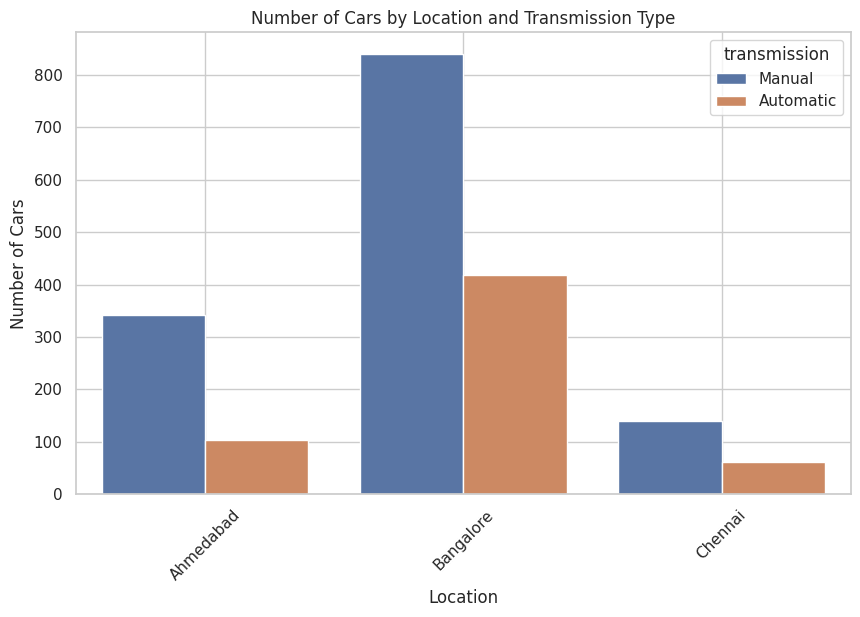

In [62]:
# Scenario 21: Number of Cars by Location and Transmission Type
plt.figure(figsize=(10, 6))
sns.countplot(x='location', hue='transmission', data=data)
plt.title('Number of Cars by Location and Transmission Type')
plt.xlabel('Location')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



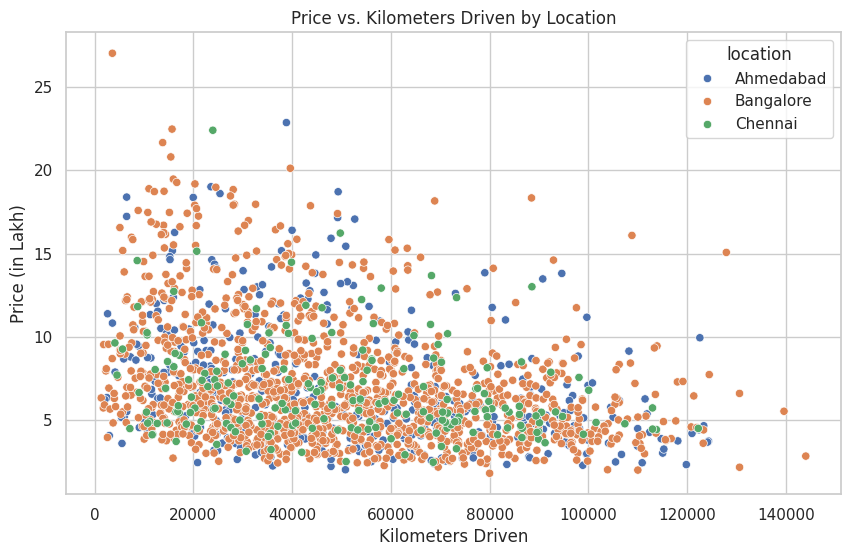

In [63]:
# Scenario 22: Price vs. Kilometers Driven by Location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='price', hue='location', data=data)
plt.title('Price vs. Kilometers Driven by Location')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in Lakh)')
plt.grid(True)
plt.show()



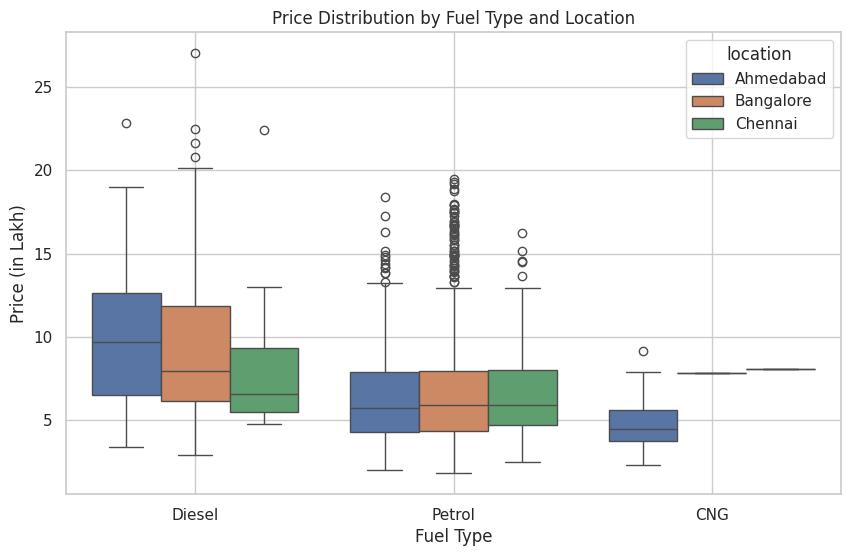

In [64]:
# Scenario 23: Price Distribution by Fuel Type and Location
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', hue='location', data=data)
plt.title('Price Distribution by Fuel Type and Location')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in Lakh)')
plt.grid(True)
plt.show()



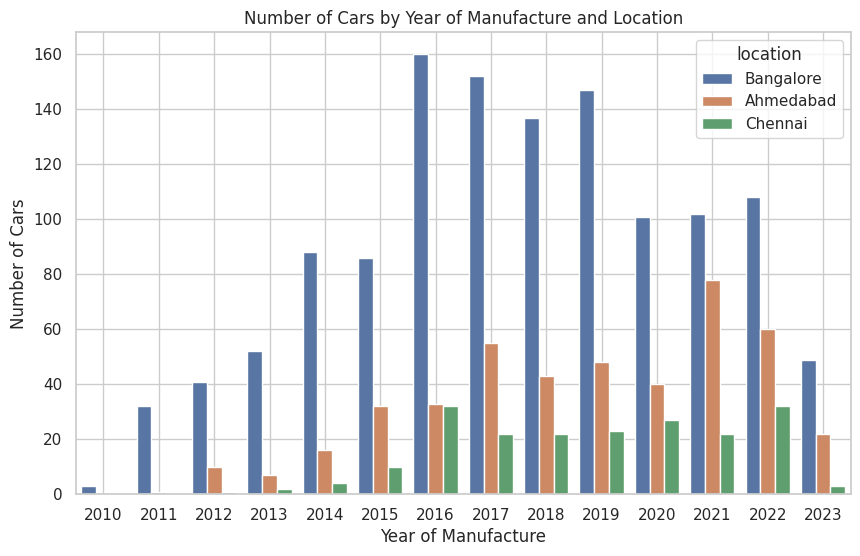

In [65]:
# Scenario 24: Number of Cars by Year of Manufacture and Location
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='location', data=data)
plt.title('Number of Cars by Year of Manufacture and Location')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()



<ipython-input-66-53690a84101e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='price', hue='location', data=data, ci=None)


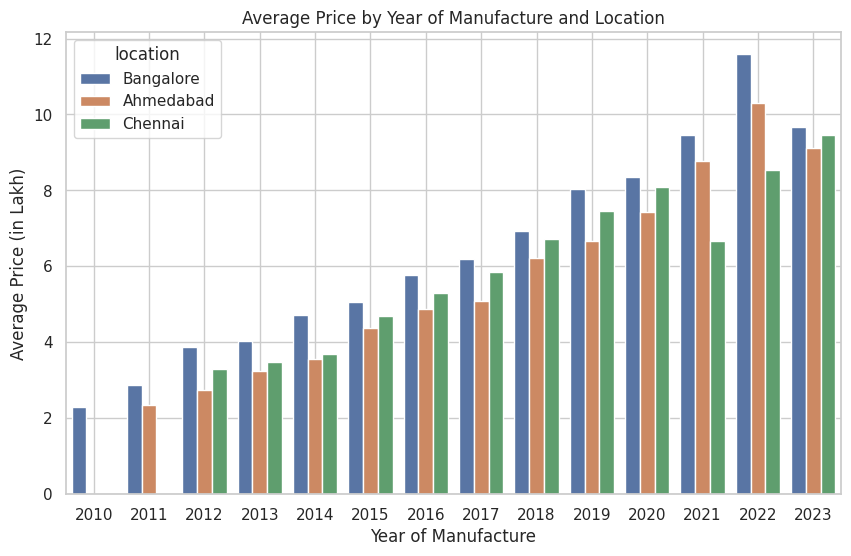

In [66]:
# Scenario 25: Average Price by Year of Manufacture and Location
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='price', hue='location', data=data, ci=None)
plt.title('Average Price by Year of Manufacture and Location')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Price (in Lakh)')
plt.grid(True)
plt.show()
